In [1]:
# Directory listing
import os

# Point to your folder path
folder_path = r'C:\Users\haboy\OneDrive\Desktop\NLP_Assigment\files_coding'

# List files
os.listdir(folder_path)


['_chat.txt']

In [2]:
# OPEN, READ AND CLOSE FILE using UTF-8 encoding
f = open(r'C:\Users\haboy\OneDrive\Desktop\NLP_Assigment\files_coding\_chat.txt', 'r', encoding='utf-8')
content = f.read()
f.close()


In [3]:
# CHECK
content[:1000]  # Show first 1000 characters to preview


"[03.04.24, 12:07:41] Nucleus Degen Calls: \u200eMessages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them.\n[03.04.24, 12:07:41] ~\u202fBlackMarshall: \u200e~\u202fBlackMarshall created this group\n[17.11.24, 11:29:47] Nucleus Degen Calls: \u200eYou joined using this group's invite link\n[17.11.24, 11:29:58] ~\u202fBlackMarshall: 9saZXmUEVPYm19VVTa1cvgqfuh3ujvS1GSzUtPg2pump\n[17.11.24, 11:30:09] ~\u202fBlackMarshall: You may want to buy small $mocha.\n\nHearing things\n[17.11.24, 11:30:17] ~\u202fBlackMarshall: CTO team forming\n[17.11.24, 11:30:29] ~\u202fKenny: \u200e~\u202fKenny joined using this group's invite link\n\u200e[17.11.24, 11:30:31] ~\u202fBlackMarshall: \u200eimage omitted\n\u200e[17.11.24, 11:30:31] ~\u202fBlackMarshall: \u200eimage omitted\n[17.11.24, 11:31:00] ~\u202fBlackMarshall: Didn’t sell mine, I sent about 1% to team and gifted some to friends\n[17.11.24, 11:31:28] ~\u202fBlackMarshall: I’ve been in this since 4k a

In [4]:
# Install missing packages
!pip install nltk matplotlib


In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haboy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haboy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haboy\AppData\Roaming\nltk_data...


True

In [8]:
# Tokenize and clean
tokens = nltk.word_tokenize(content.lower())

# Remove punctuation and empty tokens
tokens = [re.sub(r'\W+', '', token) for token in tokens if re.sub(r'\W+', '', token)]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Lemmatize
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print(lemmatized_tokens[:20])


['030424', '120741', 'nucleus', 'degen', 'call', 'message', 'call', 'endtoend', 'encrypted', 'people', 'chat', 'read', 'listen', 'share', '030424', '120741', 'blackmarshall', 'blackmarshall', 'created', 'group']


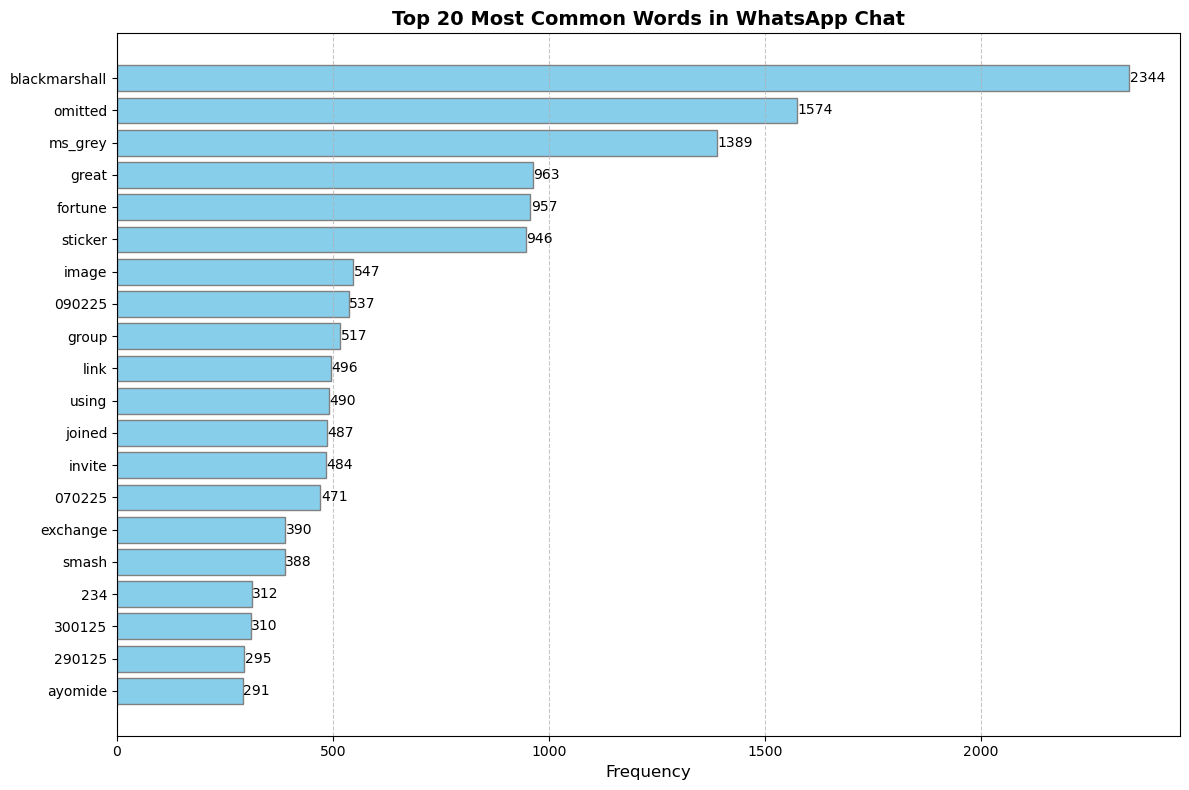

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

# Count word frequencies
token_counts = Counter(lemmatized_tokens)
top_tokens = token_counts.most_common(20)
words, freqs = zip(*top_tokens)

# Plot with improved styling
plt.figure(figsize=(12, 8))
bars = plt.barh(words[::-1], freqs[::-1], color='skyblue', edgecolor='gray')

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add frequency labels to the bars
for bar, freq in zip(bars, freqs[::-1]):
    plt.text(freq + 1, bar.get_y() + bar.get_height()/2, str(freq), va='center', fontsize=10)

# Axis and title formatting
plt.xlabel('Frequency', fontsize=12)
plt.title('Top 20 Most Common Words in WhatsApp Chat', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
